In [319]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [406]:

from sage.all import *
from utility import *



In [407]:
x,y,z = var('x, y, z', domain=CC)

# Equation of affine surface
G_eq = x*y*z + x +z +1
fibration_eq = -3*x-2*z+y
# fibration_eq = x-z+y

f = LefschetzFibration([x,y,z], G_eq, fibration_eq)

rho_eq = 3*x+z
# rho_eq = x+z

In [432]:
crit_points_f = f.get_critical_points()
crit_values_f = f.get_critical_values()


len(crit_values_f)

5

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Critical values of the fibration'}>)

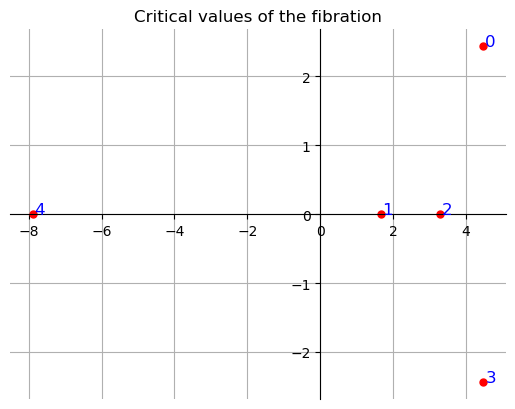

In [433]:
origin_fibre = 0
crit_values_f = sort_by_angle(crit_values_f, origin_fibre)
plot_points_ordered(crit_values_f, 'Critical values of the fibration', origin_fibre=origin_fibre)

## Images of the vanishing cycles of $f$ under $\rho$

### Critical values of $\rho$

(<Figure size 640x480 with 1 Axes>, <Axes: >)

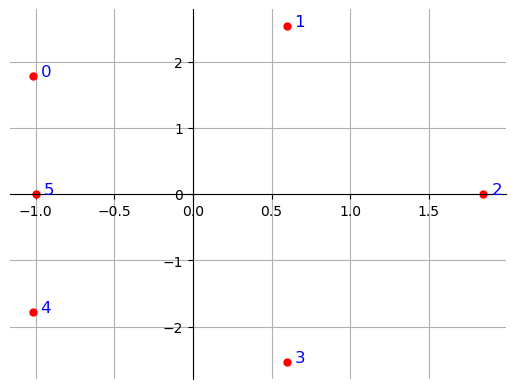

In [434]:
t = var('t', domain=CC)
fibre_t = f.get_fibre(t, y)
rho_eq_t = rho_eq.subs(y==fibre_t)
plot_points_ordered(LefschetzFibration([x,z], fibre_t.subs(t==origin_fibre), rho_eq_t.subs(t==origin_fibre)).get_critical_values(), origin_fibre=origin_fibre)

### Plot the matching paths

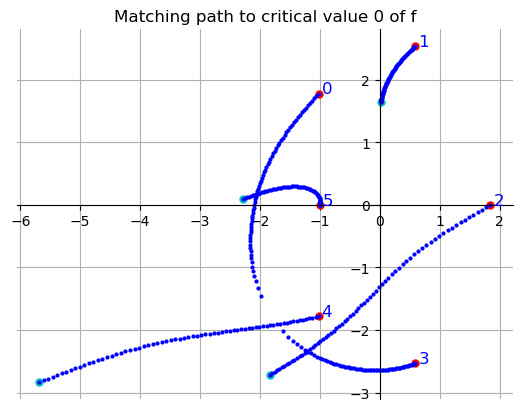

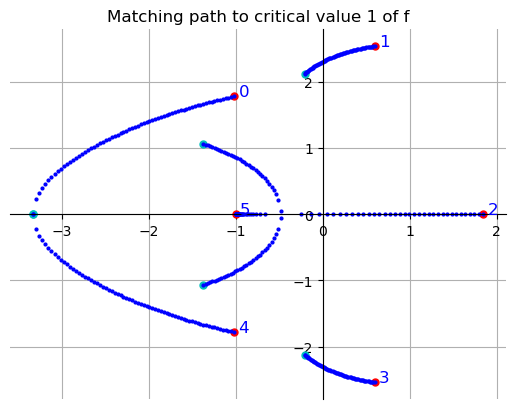

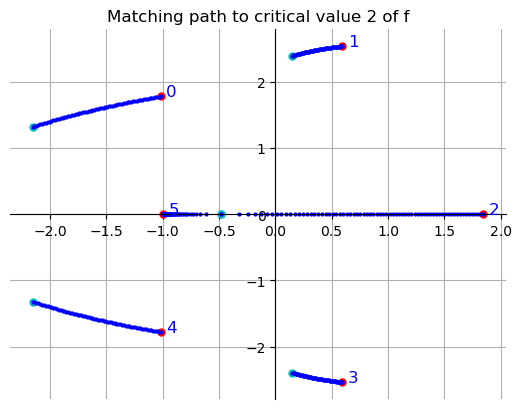

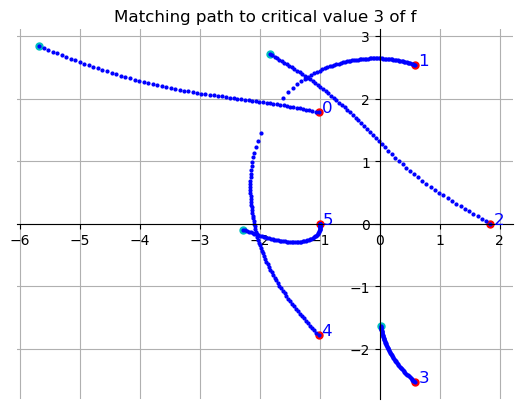

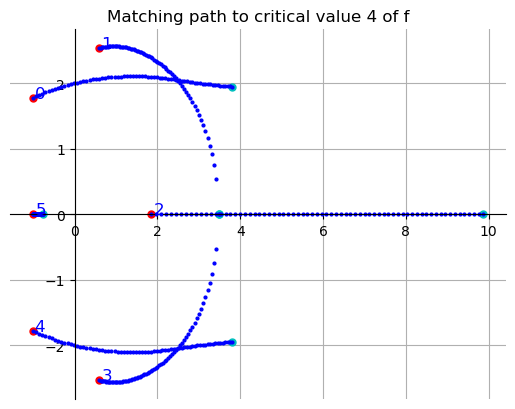

In [435]:
for index, crit in enumerate(crit_values_f):
    matching = f.get_matching_path(rho_eq, origin_fibre, crit, solvefor=y)
    fig, ax = plot_path(matching, title = f'Matching path to critical value {index} of f', origin_fibre=origin_fibre)
    plt.show()

### Plot using PW Linear paths avoiding collinear critical values

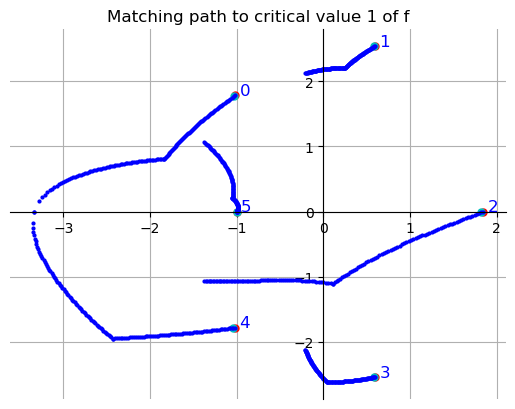

In [436]:

matching = f.get_matching_path(rho_eq, solvefor=y, path=pl_path_1(0, crit_values_f[1]))
fig, ax = plot_path(matching, title = f'Matching path to critical value 1 of f', origin_fibre=origin_fibre)
plt.show()

In [428]:
print(crit_values_f[1])
print(crit_values_f[2])

(3.2781296869160643+0j)
(1.6595844138804132+0j)
